In [63]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy.special import lambertw
from scipy import optimize
import math
import time

# 1. График функции $y = x*e^x$

Text(0, 0.5, 'Y_label')

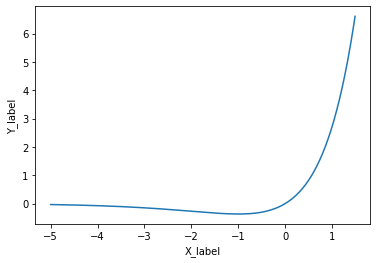

In [64]:
x = [x / 100 for x in range(-500, 150, 1)]
y = x*np.exp(x)
plt.plot(x,y)
plt.xlabel("X_label")
plt.ylabel("Y_label")

# 2. График функции Ламберта

Text(0, 0.5, 'Y_label')

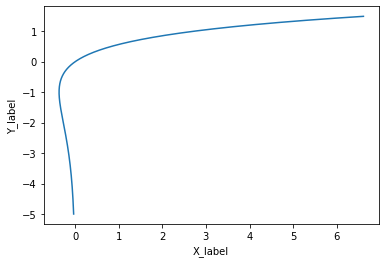

In [65]:
y = x * np.exp(x)
plt.plot(y,x)
plt.xlabel("X_label")
plt.ylabel("Y_label")

# 3. Изобразим ветви функции разным цветом

Text(0, 0.5, 'Y_label')

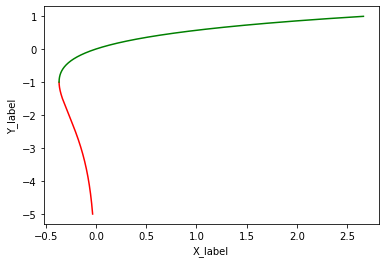

In [66]:
x = [x / 100 for x in range(-500, -100, 1)]
y = x*np.exp(x)
plt.plot(y,x, color = "r")
x = [x / 100 for x in range(-100, 100, 1)]
y = x*np.exp(x)
plt.plot(y,x, color = "g")
plt.xlabel("X_label")
plt.ylabel("Y_label")

In [67]:
# Вычислили функцию Ламберта вблизи точки -1/e, значение действительно примерно равно -1
# w = lambertw(-np.exp(-1) + 1e-6, k=0)
start_time = time.time()
w = lambertw(-0.2, k=-1)
print (w)
print (w * np.exp(w))
print("--- %s seconds ---" % (time.time() - start_time))

(-2.5426413577735265+0j)
(-0.2+0j)
--- 0.0009953975677490234 seconds ---


# 4. Напишем функцию mylambert

Используем метод scipy.optimize.root, здесь необходимо задать первоначальный параметр, для верхней ветви зададим x0 = log(value), для больших value это будет хорошее первое приближение, в случае отрицательных value можно задать x0 = 2, для нижней ветви x0 = -2, таким образом при разных значениях k будем получать разные значения функции

In [124]:
def mylambert(x, k, tol):
    if (x < -np.exp(-1) + 1e-20):
        print("Значение функции не действительное число")
        raise ValueError
    if((k == -1) & (x >= 0)):
        print("Аргумент функции у нижней ветви не может быть >= 0 ")
        raise ValueError
    if((k == 0) & (x > 0)):  
        res = scipy.optimize.root(lambda z: z * np.exp(z) - x, math.log(value), tol = 1e-5)
    if((k == 0) & (x <= 0)):  
        res = scipy.optimize.root(lambda z: z * np.exp(z) - x, 2,  tol = 1e-5)
    if(k == -1):
        res = scipy.optimize.root(lambda z: z * np.exp(z) - x, -2,  tol = 1e-5)
    return res
    

In [125]:
import time
start_time = time.time()
value = -0.2
s = mylambert(value, k = 0, tol = 1e-8)
A = s.x
print(A)
print("--- %s seconds ---" % (time.time() - start_time))

[-0.2591711]
--- 0.0010025501251220703 seconds ---


In [126]:
import time
start_time = time.time()
value = -0.2
s = mylambert(value, k = -1, tol = 1e-8)
A = s.x
print(A)
print("--- %s seconds ---" % (time.time() - start_time))

[-2.54264136]
--- 0.000997304916381836 seconds ---


Нашли разные значения функции для одного и того же value

Убедимся, что для "далеких" от точки x = - 1/e значений аргумента, значение фукнции находится корректно

In [127]:
start_time = time.time()
value = 1000000000000000000
s = mylambert(value, k = 0, tol = 1e-8)
A = s.x
print(A)
print("mylambert = %s seconds" % (time.time() - start_time))
start_time = time.time()
w = lambertw(1000000000000000000, k=0)
print (w)
print (w * np.exp(w))
print("lambertw =  %s seconds" % (time.time() - start_time))

[37.81385627]
mylambert = 0.0010001659393310547 seconds
(37.81385607558877+0j)
(1.0000000000000035e+18+0j)
lambertw =  0.000997304916381836 seconds


In [116]:
start_time = time.time()
value = -0.000000000000001
s = mylambert(value, k = -1, tol = 1e-8)
A = s.x
print(A)
print("mylambert = %s seconds" % (time.time() - start_time))
start_time = time.time()
w = lambertw(-0.000000000000001, k = -1)
print (w)
print (w * np.exp(w))
print("lambertw =  %s seconds" % (time.time() - start_time))

[-38.1811173]
mylambert = 0.00099945068359375 seconds
(-38.18111748154758+0j)
(-1e-15+0j)
lambertw =  0.0009970664978027344 seconds


# 5. Сравним mylambert и lambertw по точности и скорости работы

## 5.1 Сравним по времени работы

Для более точного результата, выполним многократное вычисление значений функций

In [100]:
start_time = time.time()
value = -0.2
for i in range (0,20000,1):
    mylambert(value, k = -1, tol = 1e-8)
Time = (time.time() - start_time)
Time = float(Time)
print("mylambert 20000 iterations = %s seconds" % Time)
print("mylambert 1 iteration = ", Time/20000)
start_time = time.time()
for i in range (0,20000,1):
    lambertw(value, k = -1)
Time = (time.time() - start_time)
Time = float(Time)
print("lambertw 20000 iterations = %s seconds" % Time)
print("lambertw 1 iteration = ", Time/20000)

mylambert 20000 iterations = 1.4196362495422363 seconds
mylambert 1 iteration =  7.098181247711181e-05
lambertw 20000 iterations = 0.06382560729980469 seconds
lambertw 1 iteration =  3.1912803649902342e-06


Видно что метод lambertw работает быстрее, чем метод mylambert

## 5.2 Сравним по точности 

Вычисления функции lambertw могут быть не очень точны вблизи точки $x_0 = 1/e$, поэтому сначал найдём значения функций именно вблизи данного значения

In [183]:
# 1) x0 = 1/e 
y = 1/math.e
print("1) x0 = 1/e = ", y)
A = mylambert(-np.exp(-1) + 1e-10, k = -1, tol = 1e-8)
B = lambertw(-np.exp(-1) + 1e-10, k = -1)
print("mylambert (x0 = 1/e):", A.x)
print("lambertw (x0 = 1/e):", B)
y1 = (A.x)*np.exp(A.x)
y2 = (B)*np.exp(B)
print("Значение полученное mylambert = ", y1)
print("Значение полученное lambertw = ", y2)
print("\n")

# 2) x0 = -0.000005
print("2) x0 = -0.000005")
A = mylambert(-0.000005, k = -1, tol = 1e-8)
B = lambertw(-0.000005, k = -1)
print("mylambert (x0 = -0.000005):", A.x)
print("lambertw (x0 = -0.000005):", B)
y1 = (A.x)*np.exp(A.x)
y2 = (B)*np.exp(B)
print("Значение полученное mylambert = ", y1)
print("Значение полученное lambertw = ", y2)
print("\n")

# 3) x0 = 1000000
print("3) x0 = 1000000")
A = mylambert(1000000, k = 0, tol = 1e-8)
B = lambertw(1000000, k = 0)
print("mylambert (x0 = 1000000):", A.x)
print("lambertw (x0 = 1000000):", B)
y1 = (A.x)*np.exp(A.x)
y2 = (B)*np.exp(B)
print("Значение полученное mylambert = ", y1)
print("Значение полученное lambertw = ", y2)

1) x0 = 1/e =  0.36787944117144233
mylambert (x0 = 1/e): [-1.00002381]
lambertw (x0 = 1/e): (-1.0000000008154843+0j)
Значение полученное mylambert =  [-0.36787944]
Значение полученное lambertw =  (-0.36787944117144233+0j)


2) x0 = -0.000005
mylambert (x0 = -0.000005): [-14.90796848]
lambertw (x0 = -0.000005): (-14.907968515205422+0j)
Значение полученное mylambert =  [-5.00000019e-06]
Значение полученное lambertw =  (-4.999999999999997e-06+0j)


3) x0 = 1000000
mylambert (x0 = 1000000): [11.38335813]
lambertw (x0 = 1000000): (11.383358086140053+0j)
Значение полученное mylambert =  [1000000.05294664]
Значение полученное lambertw =  (1000000.0000000002+0j)


Видно, что значения отличаются (для 1го случая начиная с 5 знака после запятой, для 2го и 3го случаев начиная с 7 знака после запятой). Для 1го случая получили значение = -1.00002381 и хотя значение полученное mylambert = [-0.36787944], очевидно, что начиная с какого-то знака после запятой, оно будет отличаться от x0 = 1/e =  0.36787944117144233. Значение lambertw = -1.0000000008154843, что гораздо ближе к единице. Во 2м и 3м случаях подставив полученные значения в исходную функцию $y=x*e^x$ видно, что метод lambertw так же ближе к истинному значению